# Training CNNs on CIFAR10

![alt text](https://miro.medium.com/max/1224/0*EL6Fy9lJicWeNY2z)


### Q1: Load the CIFAR10 data and visualize the first batch
a) Try some data augmentation

Extracting /data/cifar-10-python.tar.gz to /data
Files already downloaded and verified


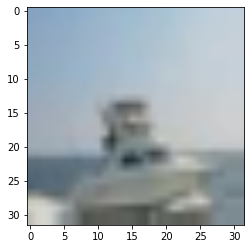

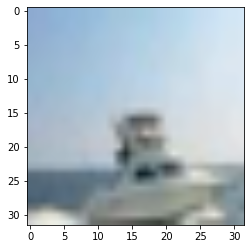

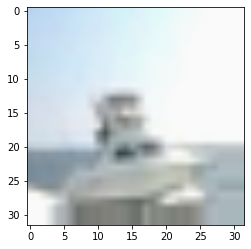

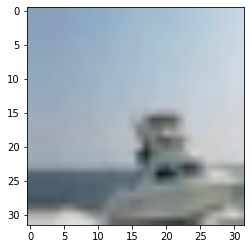

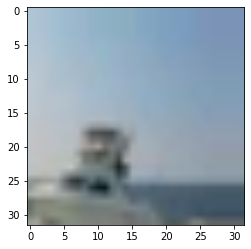

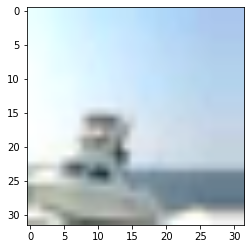

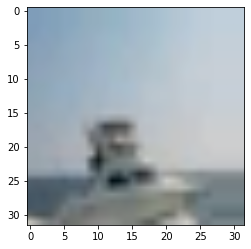

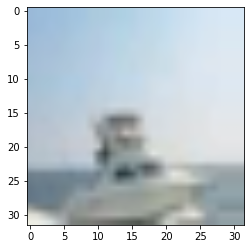

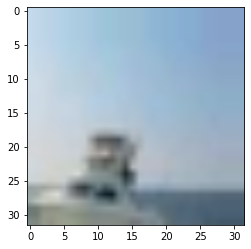

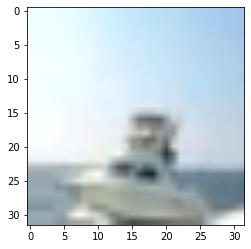

In [0]:
import torch

import matplotlib.pyplot as plt

from torchvision import datasets, transforms
  

batch_size = 128


##################  Change these lines  ####################################
# TODO: Try some data augmentation

mean, std = 0.5, 0.5
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Pad(padding=4, padding_mode='edge'),
    transforms.RandomCrop(32),
    transforms.ColorJitter(0.2, 0.2, 0.2),
    transforms.ToTensor(),
    transforms.Normalize((mean,)*3, (std,)*3)
])

transform_val = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean,)*3, (std,)*3)
])

##################  Finish changing here  ##################################


# datasets (CIFAR10)
datasets = {'train': datasets.CIFAR10('/data', train=True, download=True, transform=transform_train),
            'val': datasets.CIFAR10('/data', train=False, download=True, transform=transform_val)}

# dataloaders
loaders = {}
for phase in ['train', 'val']:
    loaders[phase] = torch.utils.data.DataLoader(datasets[phase], 
                                                 batch_size=batch_size, 
                                                 num_workers=4,
                                                 shuffle=True, 
                                                 drop_last=True)


def visualize_batch(batch, labels, ncols=8):
    nrows = (batch.shape[0] + ncols - 1) // ncols
    plt.figure(figsize=(15, 2*nrows))
    for i in range(batch.shape[0]):
        plt.subplot(nrows, ncols, i+1)
        plt.imshow(std * batch[i].permute(1, 2, 0).squeeze() + mean, interpolation='bilinear')
        plt.title(labels[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()


label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


# batch, labels = next(iter(loaders['train']))
# visualize_batch(batch, [label_names[x] for x in labels])

idx = 100
for i in range(10):
    image = datasets['train'][idx][0].numpy()
    plt.imshow(std * image.transpose(1, 2, 0) + mean, interpolation='bilinear')
    plt.show()

### Q2: Create the network
a) Try with different models and make your own architectures \\
b) Set the hyperparameters, the loss function and the optimizer

In [0]:
import torch.nn as nn
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torchvision import models


##################  Change these lines  ####################################
# TODO: Define the network architecture


# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)
# 
#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = x.view(-1, 16 * 5 * 5)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

# class Net(nn.Module):

#     def __init__(self):
#         super(Net, self).__init__()

#         self.conv_layer = nn.Sequential(

#             # Conv Layer block 1
#             nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
#             nn.BatchNorm2d(32),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2),

#             # Conv Layer block 2
#             nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
#             nn.BatchNorm2d(128),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Dropout2d(p=0.05),

#             # Conv Layer block 3
#             nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#         )

#         self.fc_layer = nn.Sequential(
#             nn.Dropout(p=0.1),
#             nn.Linear(4096, 1024),
#             nn.ReLU(inplace=True),
#             nn.Linear(1024, 512),
#             nn.ReLU(inplace=True),
#             nn.Dropout(p=0.1),
#             nn.Linear(512, 10)
#         )

#     def forward(self, x):
#         x = self.conv_layer(x)
#         x = x.view(x.size(0), -1)
#         x = self.fc_layer(x)
#         return x

# model = Net()


model = models.resnet18()
in_features = model.fc.in_features
model.fc = nn.Linear(in_features, 10)
##################  Finish changing here  ##################################

# learning rate
lr = 0.01

# number of epochs
n_epochs = 40

# loss function
lossf = nn.CrossEntropyLoss()

# try other optimizer??
optimizer = Adam(model.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)
# set device to use
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model.to(device)

cuda


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Q3: Train the network

a) Complete the code to compute the ouput of the network, the loss, to do the backprop and to compute an optimization step

![alt text](https://4.bp.blogspot.com/-Cu1mJOh11AU/XAIcUyPK0WI/AAAAAAAANNA/BRlNj0Cbt6EJHNH25D4RhB0e6_sbL1Y8QCLcBGAs/s640/28056576_10213577221682063_7572084637958860851_n.jpg)

In [0]:
import IPython.display

####### statistics part #########

loss_history = {'train': [], 'val': []}
acc_history = {'train': [], 'val': []}

batch_loss = []
batch_acc = []


def plot_results(epoch, batch, total_batches):
    IPython.display.clear_output(wait=True)
    plt.figure(figsize=(15, 4))

    plt.subplot(1, 4, 1)
    plt.title('Batch loss (epoch: %d, batch: %d/%d)' % (epoch, batch, total_batches))
    plt.plot(batch_loss)
    plt.yscale('log')
    plt.xlabel('step')

    plt.subplot(1, 4, 2)
    plt.title('Batch accuracy')
    plt.plot(batch_acc)
    plt.xlabel('step')

    plt.subplot(1, 4, 3)
    plt.title('loss')
    for phase in ['train', 'val']:
        plt.plot(loss_history[phase], label=phase)
        plt.yscale('log')
    plt.xlabel('epoch')
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.xlabel('epoch')
    if len(acc_history['train']) > 0:
        plt.title('accuracy ' + ','.join(['%s: %.3f' % (phase, acc_history[phase][-1]) for phase in ['train', 'val']]))
    else: 
        plt.title('accuracy')

    for phase in ['train', 'val']:
        plt.plot(acc_history[phase], label=phase)
    plt.legend()

    plt.tight_layout()
    plt.show(block=False)

####### end statistics part #########

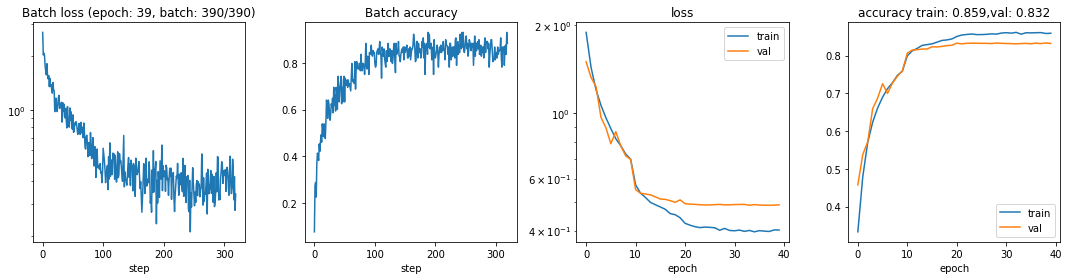

In [0]:
# number of batches in for the train and validation phases
num_batches = {'train': len(loaders['train']),
               'val': len(loaders['val'])}

# iterate on epochs
for i in range(n_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()  

        running_loss = 0.0
        running_acc = 0.0

        # iterate on batches
        for j, (samples, targets) in enumerate(loaders[phase]):
            samples, targets = samples.to(device), targets.to(device)
            
            ##################  Change these lines  ####################################
            # TODO: compute the ouput of the network, the loss, do the backprop and an 
            # optimization step
            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(samples)
                loss = lossf(outputs, targets)
                
                if phase == 'train':
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()

            ##################  Finish changing here  ##################################

            acc = torch.sum(outputs.max(dim=1)[1] == targets).item() / batch_size
            running_loss += loss.item()
            running_acc += acc
            
            if j % 50 == 0 and phase == 'train':
                # track batch history
                batch_loss.append(loss.item())
                batch_acc.append(acc)
                plot_results(i, j, num_batches[phase])
        
        running_loss /= num_batches[phase]
        running_acc /= num_batches[phase]
        loss_history[phase].append(running_loss)
        acc_history[phase].append(running_acc)

    scheduler.step()
    plot_results(i, num_batches['train'], num_batches['train'])

### Prediction examples

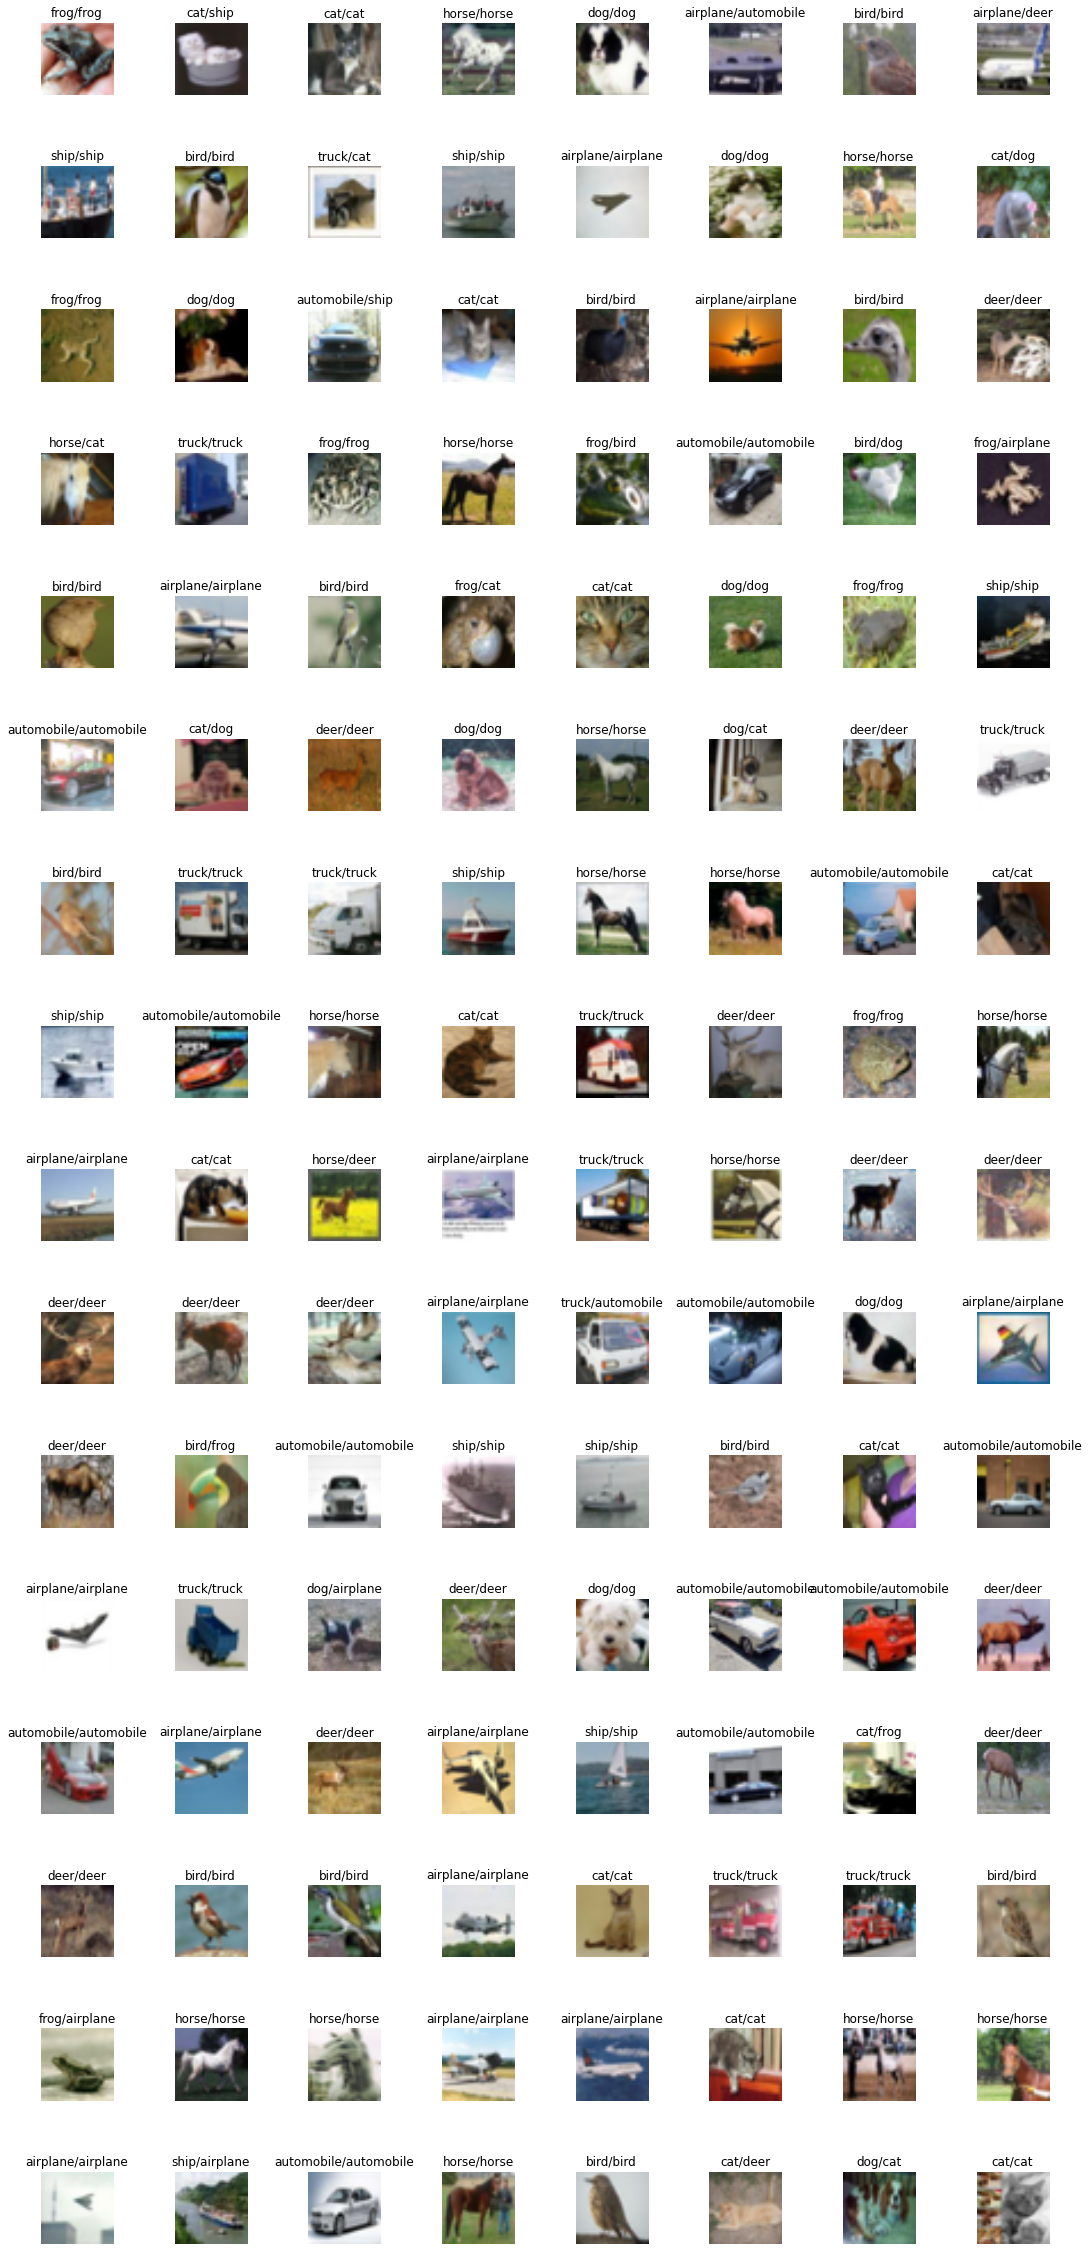

In [0]:
model.eval()
with torch.set_grad_enabled(False):
    samples, labels = next(iter(loaders['val']))
    outputs = model(samples.to(device))
    pred = outputs.max(dim=1)[1]
    visualize_batch(samples, ['%s/%s' % (label_names[labels[i]], label_names[pred[i]]) for i in range(len(labels))])

### Confusion matrix

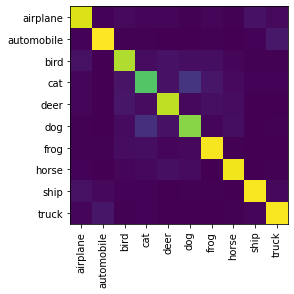

In [0]:
import numpy as np


model.eval()
with torch.set_grad_enabled(False):
    matrix = np.zeros(shape=(10, 10))
    # iterate on batches
    for samples, targets in loaders['val']:
        samples, targets = samples.to(device), targets.to(device)
        outputs = model(samples)
        pred = outputs.max(dim=1)[1]
        
        for i in range(targets.shape[0]):
            matrix[targets[i]][pred[i]] += 1

    plt.imshow(matrix)

    plt.xticks(range(10), label_names, rotation='vertical');
    plt.yticks(range(10), label_names);

### Probabilities of some samples

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


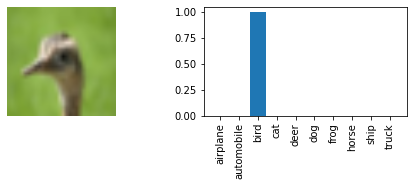

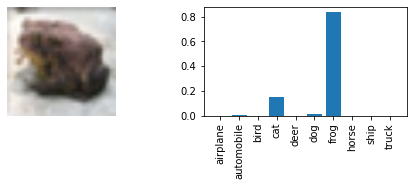

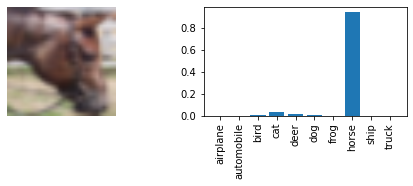

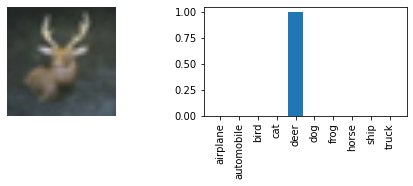

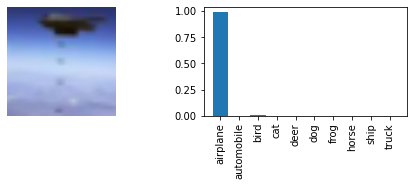

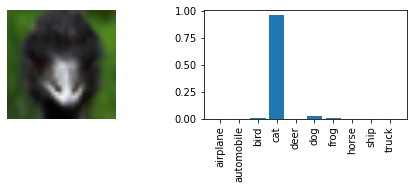

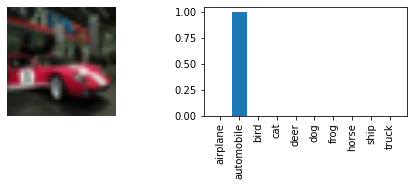

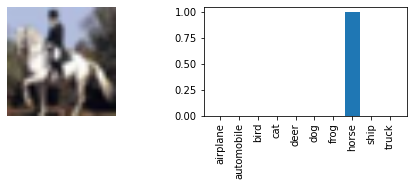

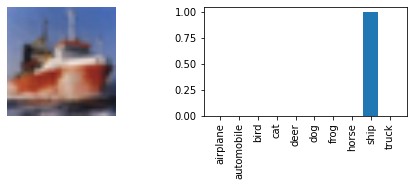

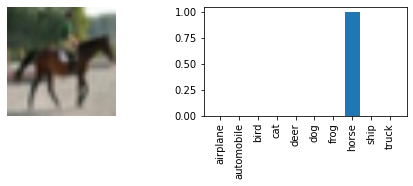

In [0]:
import torch.nn.functional as F
import numpy as np


model.eval()
with torch.set_grad_enabled(False):

    samples, targets = next(iter(loaders['val']))
    samples, targets = samples.to(device), targets.to(device)
    outputs = model(samples)
    
    for i in range(min(10, targets.shape[0])):
        plt.figure(figsize=(8, 2))
        
        plt.subplot(1, 2, 1)
        plt.imshow(std * samples[i].cpu().permute(1, 2, 0).squeeze() + mean, interpolation='bilinear')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        
        p = F.softmax(outputs[i].detach().squeeze()).cpu()
        plt.bar(range(len(p)), p)
        plt.xticks(range(len(p)), label_names, rotation='vertical')
        plt.show()
